In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_json('loan_approval_dataset.json')

In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### 1. Visualization

In [6]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [8]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [9]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

<Axes: xlabel='Risk_Flag', ylabel='count'>

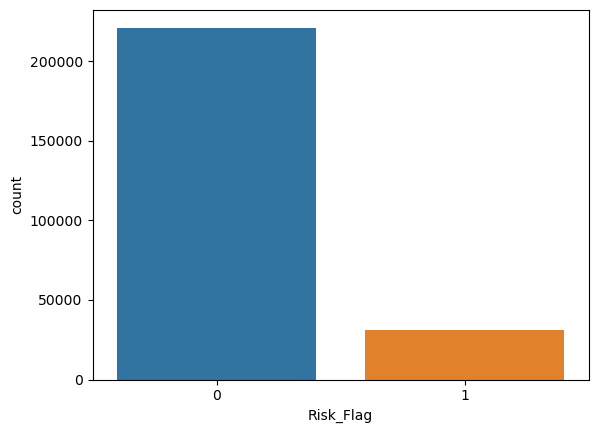

In [10]:
#imbalanced data
sns.countplot(x=df['Risk_Flag'])

C:\Users\shahj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


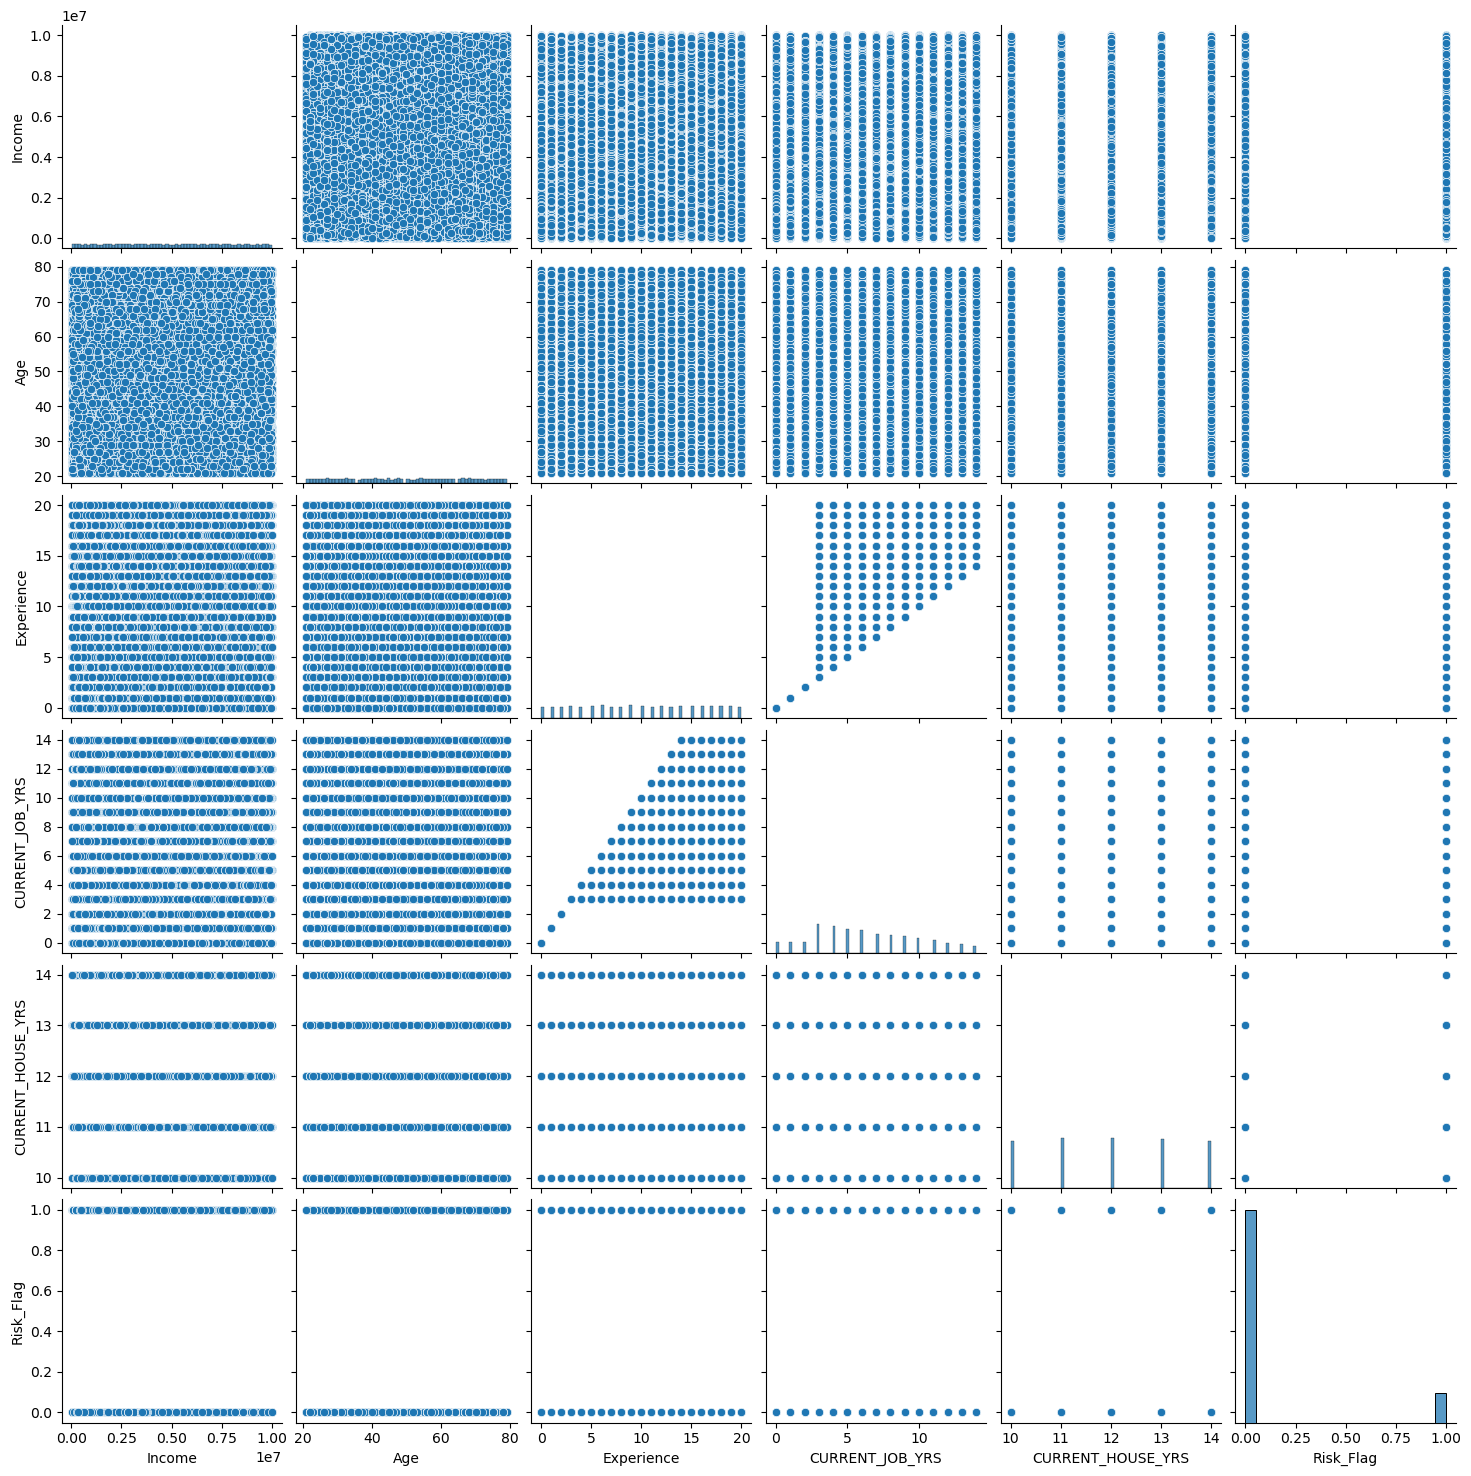

In [11]:
sns.pairplot(df)

In [8]:
num_cols=df.select_dtypes([int,float]).columns
cat_cols=df.select_dtypes([object]).columns

<Axes: >

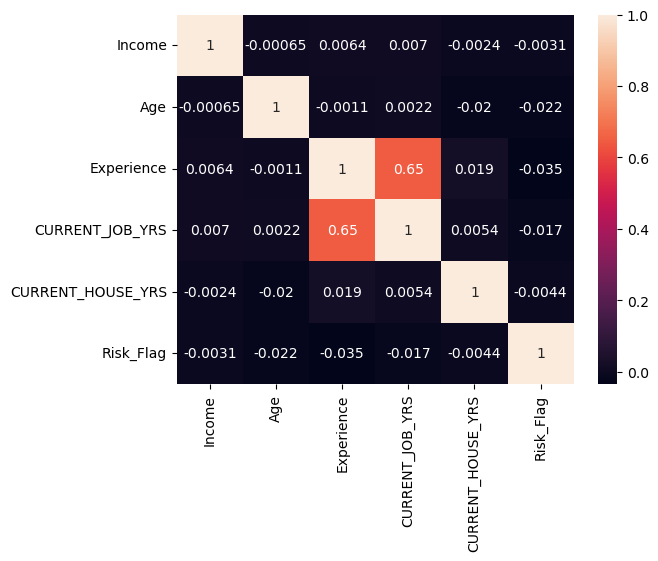

In [13]:
#High Correlation between CURRENT_JOB_YRS and Experience
sns.heatmap(df[num_cols].corr(), annot=True)

In [14]:
df['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [15]:
df['Car_Ownership'].value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

In [16]:
df['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

In [17]:
df['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

### 2. Preprocessing

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Risk_Flag',axis=1),df['Risk_Flag'])

In [6]:
x_train.shape

(189000, 11)

In [9]:
num_cols=num_cols.drop('Risk_Flag')

In [10]:
num_cols

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object')

In [11]:
trans=ColumnTransformer(transformers=[
    ('sc',StandardScaler(),num_cols),
    ('ohe',OneHotEncoder(drop='first'),cat_cols)
])
x_train_new=trans.fit_transform(x_train)
x_test_new=trans.transform(x_test)

In [12]:
x_train_new.shape

(189000, 403)

### 3. Model Selection

In [13]:
#Using TruncatedSVD Dimensionality Reduction as data is sparse
tsvd=TruncatedSVD(n_components=50)

In [14]:
x_train1=tsvd.fit_transform(x_train_new)
x_test1=tsvd.transform(x_test_new)

In [15]:
x_train1.shape

(189000, 50)

In [16]:
x_train1

array([[ 1.40611766, -1.83731927, -1.68170487, ...,  0.05154551,
         0.05882753, -0.00991086],
       [ 1.02331875, -0.01672416, -1.68055195, ..., -0.08553575,
        -0.15684672, -0.19349074],
       [ 1.37756419, -1.3753297 , -0.66338672, ..., -0.0545284 ,
         0.02526892, -0.15259093],
       ...,
       [ 1.38235424,  0.99154601,  0.68312339, ...,  0.07396451,
         0.04130693, -0.03309123],
       [ 1.37441732,  0.91108849,  1.30785745, ...,  0.06005746,
         0.15109011,  0.04368345],
       [ 1.63981998,  0.37090585, -0.77518602, ...,  0.0531815 ,
         0.02813172,  0.02690649]])

In [28]:
!pip install xgboost
!pip install catboost

In [29]:
!pip install imblearn

#### Dealing with Imbalanced Data Using Class Weights

In [17]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [18]:
xgb=XGBClassifier(scale_pos_weight=5, max_depth=25, n_jobs=-1)
rf=RandomForestClassifier(class_weight={0:1,1:5},max_depth=20,n_jobs=-1, n_estimators=100)
cb=CatBoostClassifier(class_weights={0:1,1:5},max_depth=10,n_estimators=200,verbose=False)

In [108]:
cross_val=np.zeros(3)
i=0
models=[xgb,rf,cb]
for model in models:
    model.fit(x_train1,y_train)
    y_pred=model.predict(x_test1)
    print(model)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cross_val[i]=np.mean(cross_validate(model, x_train1, y_train, cv=5, scoring='accuracy')['test_score'])
    i+=1
print(cross_val)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Confusion Matrix:
[[50335  4957]
 [ 1736  5972]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     55292
           1       0.55      0.77      0.64      7708

    accur

#### Dealing with Imbalanced Data Using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sm=SMOTE()

In [21]:
x_train_smote,y_train_smote=sm.fit_resample(x_train1,y_train)

In [22]:
xgb_sm=XGBClassifier(max_depth=25, n_jobs=-1)
rf_sm=RandomForestClassifier(max_depth=20,n_jobs=-1, n_estimators=100)
cb_sm=CatBoostClassifier(max_depth=10,n_estimators=200, verbose=False)

In [106]:
cross_val_sm=np.zeros(3)
j=0
models_sm=[xgb_sm,rf_sm,cb_sm]
for model_sm in models_sm:
    model_sm.fit(x_train_smote,y_train_smote)
    y_pred_sm=model_sm.predict(x_test1)
    print(model_sm)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_sm))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_sm))
    cross_val_sm[j]=np.mean(cross_validate(model_sm, x_train_smote, y_train_smote, cv=5, scoring='accuracy')['test_score'])
    j+=1
print(cross_val_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Confusion Matrix:
[[50091  5201]
 [ 1673  6035]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     55292
           1       0.54      0.78      0.64      7708

    accur

#### Dealing with Imbalanced Data Using Ensemble Methods

In [61]:
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier

In [97]:
brf=BalancedRandomForestClassifier(max_depth=15, n_jobs=-1,verbose=0)
rus=RUSBoostClassifier(replacement=True, learning_rate=0.5)

In [89]:
brf.fit(x_train1,y_train)

C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(max_depth=15, n_jobs=-1)

In [98]:
rus.fit(x_train1,y_train)

RUSBoostClassifier(learning_rate=0.5, replacement=True)

In [90]:
y_pred_brf=brf.predict(x_test1)

In [99]:
y_pred_rus=rus.predict(x_test1)

In [91]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_brf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf))
print("Cross Validation:",np.mean(cross_validate(brf, x_train1, y_train, cv=5, scoring='accuracy')['test_score']))

Confusion Matrix:
[[48854  6438]
 [ 1376  6332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     55292
           1       0.50      0.82      0.62      7708

    accuracy                           0.88     63000
   macro avg       0.73      0.85      0.77     63000
weighted avg       0.91      0.88      0.89     63000



C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shahj\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\shahj

Cross Validation: 0.875095238095238


In [100]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rus))
print("Classification Report:")
print(classification_report(y_test, y_pred_rus))
print("Cross Validation:\n",np.mean(cross_validate(rus, x_train1, y_train, cv=5, scoring='accuracy')['test_score']))

Confusion Matrix:
[[31114 24178]
 [ 3245  4463]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     55292
           1       0.16      0.58      0.25      7708

    accuracy                           0.56     63000
   macro avg       0.53      0.57      0.47     63000
weighted avg       0.81      0.56      0.64     63000

Cross Validation:
 0.5572433862433862


#### Using Stacking Ensemble to Predict the final result on SMOTE as well as Class Weights Methods

In [23]:
from sklearn.ensemble import StackingClassifier

In [24]:
sc=StackingClassifier(estimators=[('xgb',xgb),('rf',rf),('cb',cb)],final_estimator=RandomForestClassifier(max_depth=10))
sc_sm=StackingClassifier(estimators=[('xgb_sm',xgb_sm),('rf_sm',rf_sm),('cb_sm',cb_sm)],final_estimator=RandomForestClassifier(max_depth=10))

In [25]:
sc.fit(x_train1,y_train)
sc_sm.fit(x_train_smote,y_train_smote)

StackingClassifier(estimators=[('xgb_sm',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learni...
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf_sm',
                                RandomForestClassifier(max_depth=20,
                                                       n_jobs=-1)),
                               ('cb_sm',
                                <catboost.core.CatBoostClassifier object at 0x00000202616E81D0>)],
                   final_estimator=RandomForestClassifier(max_depth=10))

In [26]:
y_pred_=sc.predict(x_test1)
y_pred_sm_=sc_sm.predict(x_test1)

In [37]:
#Class Weight
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_))
print("Classification Report:")
print(classification_report(y_test, y_pred_))
print("Cross Validation:\n",np.mean(cross_validate(sc, x_train1, y_train, cv=5, scoring='accuracy')['test_score']))

Confusion Matrix:
[[51729  3646]
 [ 2687  4938]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     55375
           1       0.58      0.65      0.61      7625

    accuracy                           0.90     63000
   macro avg       0.76      0.79      0.78     63000
weighted avg       0.91      0.90      0.90     63000

Cross Validation:
 0.8997936507936508


In [36]:
#SMOTE
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sm_))
print("Classification Report:")
print(classification_report(y_test, y_pred_sm_))
print("Cross Validation:\n",np.mean(cross_validate(sc_sm, x_train_smote, y_train_smote, cv=5, scoring='accuracy')['test_score']))

Confusion Matrix:
[[50311  5064]
 [ 1719  5906]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     55375
           1       0.54      0.77      0.64      7625

    accuracy                           0.89     63000
   macro avg       0.75      0.84      0.79     63000
weighted avg       0.92      0.89      0.90     63000

Cross Validation:
 0.9423018357623156
